In [6]:
import torch
import numpy as np
from tqdm.notebook import trange, tqdm
import pickle as pkl

import pandas as pd
image_embeddings = torch.load("../clip_embedded_images.pt").cpu()
text_embeddings = torch.load("../clip_embedded_texts.pt").cpu()
labels = torch.load("../clip_embedded_image_labels.pt").cpu()
# proj = np.load("../imagenet_text2img_upsampled2_balanced_proj400.npy")
proj = np.load("../imagenet_text2img_upsampled5_balanced_proj.npy")
# proj = np.load("/nethome/bdevnani3/flash1/long_tail_lang/proj_matrices/cupl_l2_proj_mi
## test data

test_images = torch.load( "../clip_embedded_images_test.pt").cpu()
test_labels = torch.load( "../clip_embedded_labels_test.pt").cpu()

In [7]:
selected_labels = [947, 46, 52, 235, 257, 587, 828, 119, 725, 824, 849, 307, 222, 376, 162, 40, 878, 301, 82, 992]

In [8]:
freqs = {}
for label in labels:
    label = label.item()
    if label not in freqs:
        freqs[label] = 0
    freqs[label] +=1
    
label_cats = {"many":[], "med":[], "few":[]}
for label in set(labels):
    label = label.item()
    if freqs[label] > 100:
        label_cats["many"].append(label)
    elif freqs[label] > 20:
        label_cats["med"].append(label)
    else:
        label_cats["few"].append(label)

In [9]:
label_cats

{'many': [628,
  302,
  951,
  2,
  870,
  976,
  86,
  624,
  333,
  760,
  566,
  46,
  86,
  737,
  567,
  404,
  763,
  121,
  250,
  566,
  245,
  371,
  679,
  272,
  806,
  880,
  417,
  192,
  536,
  658,
  437,
  652,
  333,
  352,
  30,
  746,
  715,
  126,
  90,
  755,
  856,
  451,
  417,
  333,
  816,
  48,
  426,
  915,
  787,
  591,
  674,
  3,
  444,
  329,
  302,
  540,
  89,
  984,
  904,
  112,
  191,
  665,
  270,
  235,
  296,
  972,
  490,
  901,
  944,
  325,
  398,
  131,
  278,
  419,
  820,
  8,
  490,
  520,
  733,
  1,
  46,
  331,
  72,
  475,
  958,
  126,
  417,
  150,
  601,
  591,
  934,
  855,
  4,
  560,
  783,
  201,
  870,
  176,
  870,
  566,
  672,
  573,
  272,
  668,
  679,
  763,
  419,
  655,
  775,
  346,
  752,
  304,
  876,
  473,
  951,
  984,
  880,
  885,
  519,
  934,
  947,
  929,
  479,
  347,
  19,
  52,
  834,
  412,
  665,
  361,
  988,
  413,
  665,
  951,
  93,
  802,
  757,
  137,
  773,
  279,
  413,
  320,
  613,
  886,
  948,

In [5]:
import seaborn as sns
from classes import CLASSES

In [11]:
train_indx = [i for i,l in enumerate(labels) if l in selected_labels]
test_indx = [i for i,l in enumerate(test_labels) if l in selected_labels]

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_proj = np.matmul(text_embeddings.cpu(), proj)
data_proj = data_proj / np.linalg.norm(data_proj, axis=-1, keepdims=True)
data_proj = 0.25*(data_proj) + 0.75*(image_embeddings)
convex_comb = 0.25*(text_embeddings) + 0.75*(image_embeddings)
pca_input = torch.cat([image_embeddings[train_indx],text_embeddings[train_indx], data_proj[train_indx], convex_comb[train_indx], test_images[test_indx]])
print(pca_input.shape)
pca_result = pca.fit_transform(pca_input)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

print(image_embeddings.shape, text_embeddings.shape, data_proj.shape, convex_comb.shape, image_embeddings.shape)

torch.Size([13464, 1024])
Explained variation per principal component: [0.21245665 0.08935269 0.08571607]
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 13464 samples in 0.005s...


/nethome/bdevnani3/flash1/miniconda3/envs/ltr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/nethome/bdevnani3/flash1/miniconda3/envs/ltr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 13464 samples in 0.703s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13464
[t-SNE] Computed conditional probabilities for sample 2000 / 13464
[t-SNE] Computed conditional probabilities for sample 3000 / 13464
[t-SNE] Computed conditional probabilities for sample 4000 / 13464
[t-SNE] Computed conditional probabilities for sample 5000 / 13464
[t-SNE] Computed conditional probabilities for sample 6000 / 13464
[t-SNE] Computed conditional probabilities for sample 7000 / 13464
[t-SNE] Computed conditional probabilities for sample 8000 / 13464
[t-SNE] Computed conditional probabilities for sample 9000 / 13464
[t-SNE] Computed conditional probabilities for sample 10000 / 13464
[t-SNE] Computed conditional probabilities for sample 11000 / 13464
[t-SNE] Computed conditional probabilities for sample 12000 / 13464
[t-SNE] Computed conditional probabilities for sample 13000 / 13464
[t-SNE] Computed conditional probabilities for sample 13464 / 13464

In [65]:
with open('tsne_results.npy', 'wb') as f:
    np.save(f, tsne_results)

In [66]:
tsne_results = np.load("tsne_results.npy")

In [14]:
cls = 947
(print("Class name:", CLASSES[cls]))
for cat in label_cats:
    if cls in label_cats[cat]:
        print(f"{cat} Category, {freqs[cls]}")

Class name: mushroom
many Category, 284


In [16]:
n = len(train_indx)

tsne_im,tsne_text, tsne_text_proj, tsne_convex_comb, tsne_im_test \
= tsne_results[0:n, :], tsne_results[n: (n*2), :], tsne_results[(n*2):(n*3), :], tsne_results[(n*3):(n*4), :], tsne_results[(n*4):, :]

print(tsne_im.shape)
print(tsne_text.shape)
print(tsne_text_proj.shape)
print(tsne_convex_comb.shape)
print(tsne_im_test.shape)


(3116, 2)
(3116, 2)
(3116, 2)
(3116, 2)
(1000, 2)


In [18]:
cls_idx = np.where(labels[train_indx] == cls)
tsne_im,tsne_text, tsne_text_proj, tsne_convex_comb = \
    tsne_im[cls_idx,:], tsne_text[cls_idx,:], tsne_text_proj[cls_idx,:], tsne_convex_comb[cls_idx,:]

In [19]:
cls_idx = np.where(test_labels[test_indx] == cls)
tsne_im_test = tsne_im_test[cls_idx,:]

In [20]:
print(tsne_im.shape)
print(tsne_text.shape)
print(tsne_text_proj.shape)
print(tsne_convex_comb.shape)
print(tsne_im_test.shape)

(1, 284, 2)
(1, 284, 2)
(1, 284, 2)
(1, 284, 2)
(1, 50, 2)


Text(0.5, 1.0, 'Class name:mushroom 947')

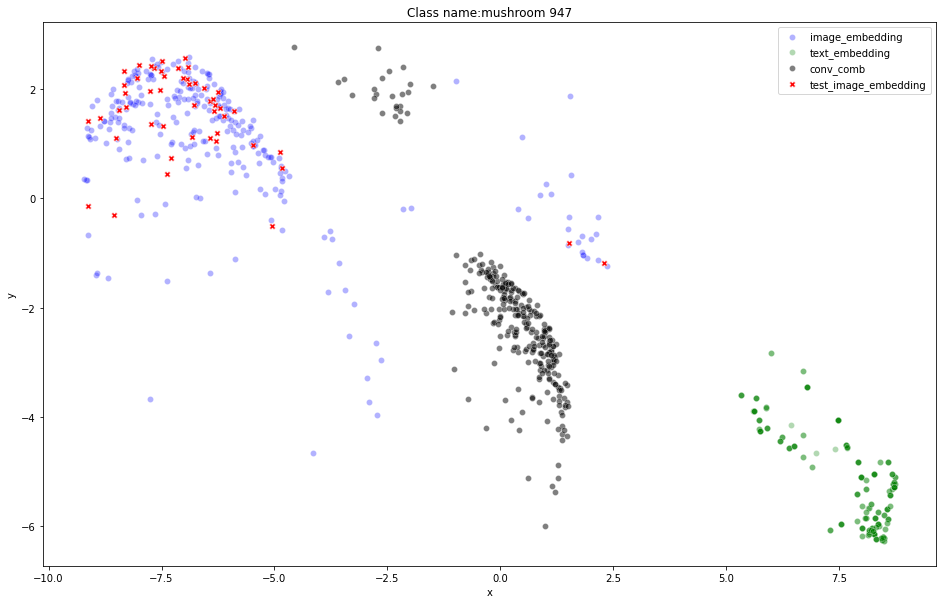

In [21]:
tsne_im_df = pd.DataFrame()
tsne_im_df["x"] = tsne_im[0,:,0]
tsne_im_df["y"] = tsne_im[0,:,1]

tsne_text_df = pd.DataFrame()
tsne_text_df["x"] = tsne_text[0,:,0]
tsne_text_df["y"] = tsne_text[0,:,1]

tsne_text_proj_df = pd.DataFrame()
tsne_text_proj_df["x"] = tsne_text_proj[0,:,0]
tsne_text_proj_df["y"] = tsne_text_proj[0,:,1]

tsne_convex_comb_df = pd.DataFrame()
tsne_convex_comb_df["x"] = tsne_convex_comb[0,:,0]
tsne_convex_comb_df["y"] = tsne_convex_comb[0,:,1]

tsne_im_test_df = pd.DataFrame()
tsne_im_test_df["x"] = tsne_im_test[0,:,0]
tsne_im_test_df["y"] = tsne_im_test[0,:,1]

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    data=tsne_im_df,
#     legend="image_embedding",
    alpha=0.3,
    color="b",
    label="image_embedding"
)

sns.scatterplot(
    x="x", y="y",
    data=tsne_text_df,
#     legend="text_embedding",
    alpha=0.3,
    color="g",
    label="text_embedding"
)

# sns.scatterplot(
#     x="x", y="y",
#     data=tsne_text_proj_df,
# #     legend="proj_text_embedding",
#     alpha=0.3,
#     color="r",
#     label="proj_text_embedding"
# )

sns.scatterplot(
    x="x", y="y",
    data=tsne_convex_comb_df,
#     legend="proj_text_embedding",
    alpha=0.5,
    color="k",
    label="conv_comb"
)

sns.scatterplot(
    x="x", y="y",
    data=tsne_im_test_df,
#     legend="proj_text_embedding",
    alpha=1,
    color="r",
    marker = "X",
    label="test_image_embedding"
)

plt.title("Class name:" +CLASSES[cls] + " " + str(cls))

# plt.axis([-20, 20, -20, 20])


0it [00:00, ?it/s]

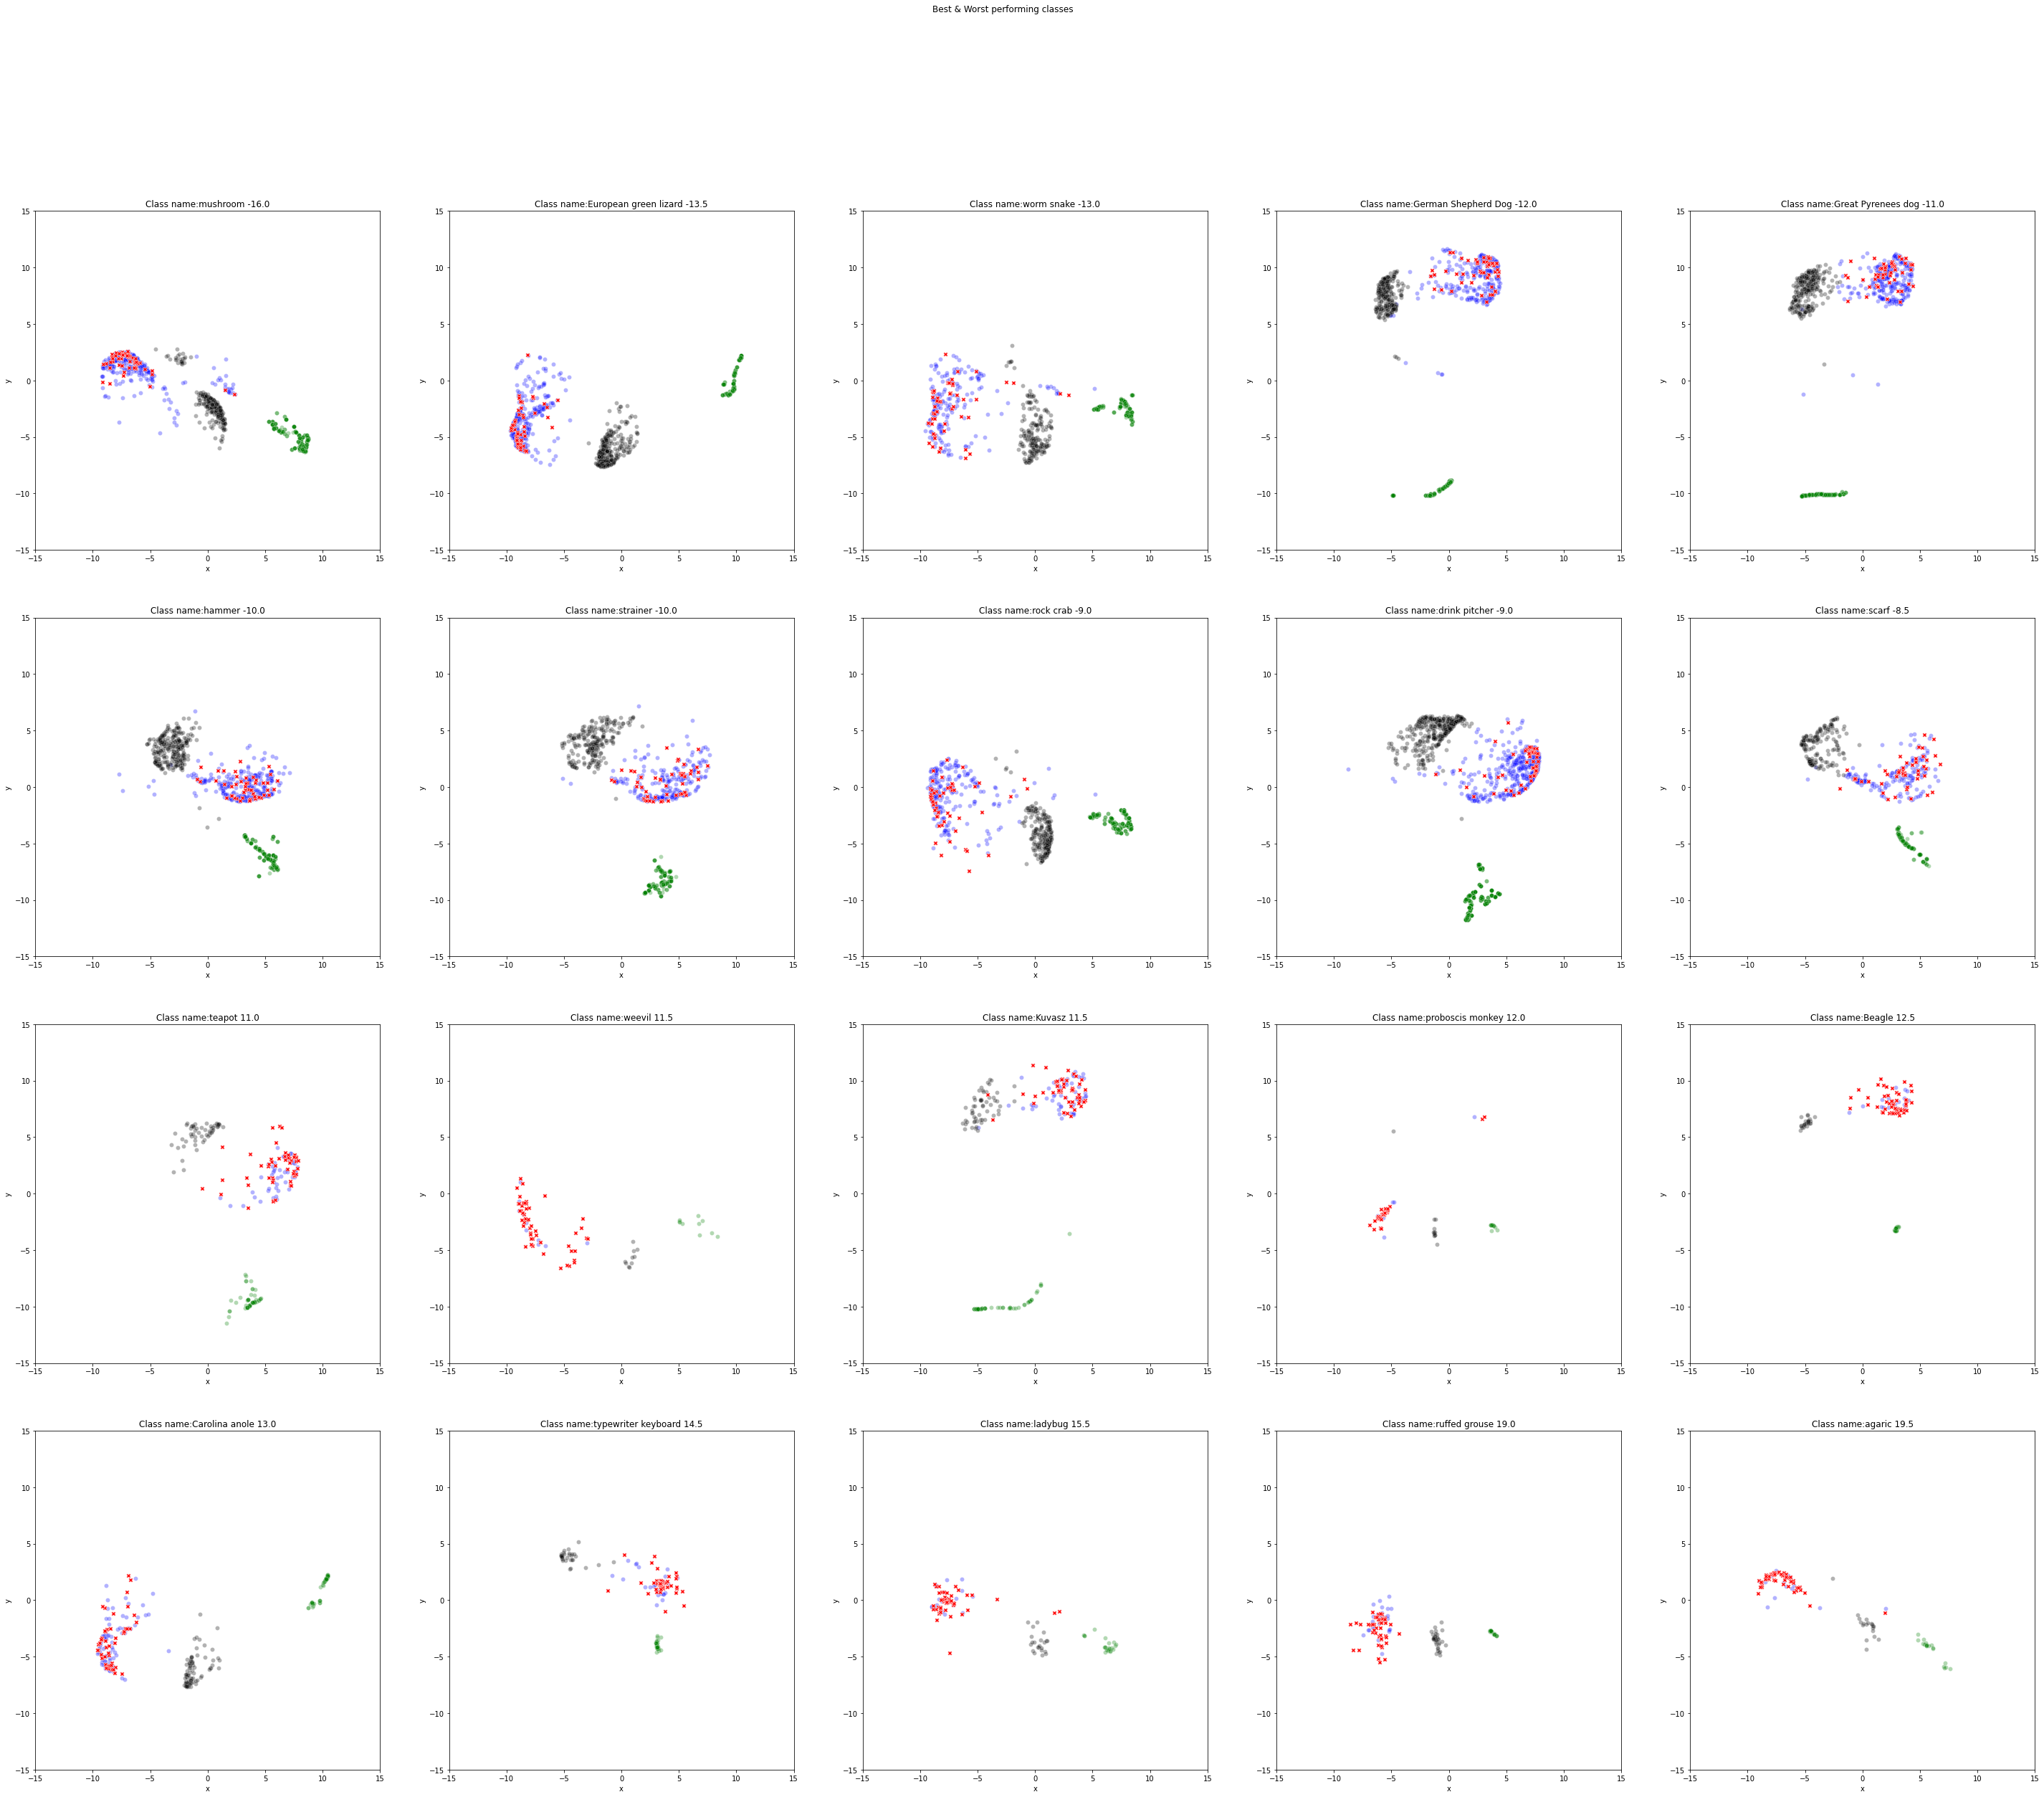

In [26]:
# Worst performing classes


fig, axes = plt.subplots(4,5)
# fig, axes = plt.subplots(2,2)
fig.suptitle('Best & Worst performing classes')
fig.set_figheight(40)
fig.set_figwidth(50)


performance = [-16.0, -13.5, -13.0, -12.0, -11.0, -10.0, -10.0, -9.0, -9.0, -8.5, 11.0, 11.5, 11.5, 12.0, 12.5, 13.0, 14.5, 15.5, 19.0, 19.5]
# performance = [-16.0, -13.5, 19.0, 19.5]


x = 0
y = 0

for i,cls in tqdm(enumerate([947, 46, 52, 235, 257, 587, 828, 119, 725, 824, 849, 307, 222, 376, 162, 40, 878, 301, 82, 992])):
# for i,label in tqdm(enumerate([947, 46, 82, 992])):

    n = len(train_indx)

    tsne_im,tsne_text, tsne_text_proj, tsne_convex_comb, tsne_im_test \
    = tsne_results[0:n, :], tsne_results[n: (n*2), :], tsne_results[(n*2):(n*3), :], tsne_results[(n*3):(n*4), :], tsne_results[(n*4):, :]

    
    x = int(i/5)
    y = int(i%5)
    

    cls_idx = np.where(labels[train_indx] == cls)
    tsne_im,tsne_text, tsne_text_proj, tsne_convex_comb = \
    tsne_im[cls_idx,:], tsne_text[cls_idx,:], tsne_text_proj[cls_idx,:], tsne_convex_comb[cls_idx,:]

    cls_idx = np.where(test_labels[test_indx] == cls)
    tsne_im_test = tsne_im_test[cls_idx,:]
    
    tsne_im_df = pd.DataFrame()
    tsne_im_df["x"] = tsne_im[0,:,0]
    tsne_im_df["y"] = tsne_im[0,:,1]

    tsne_text_df = pd.DataFrame()
    tsne_text_df["x"] = tsne_text[0,:,0]
    tsne_text_df["y"] = tsne_text[0,:,1]

    tsne_text_proj_df = pd.DataFrame()
    tsne_text_proj_df["x"] = tsne_text_proj[0,:,0]
    tsne_text_proj_df["y"] = tsne_text_proj[0,:,1]

    tsne_convex_comb_df = pd.DataFrame()
    tsne_convex_comb_df["x"] = tsne_convex_comb[0,:,0]
    tsne_convex_comb_df["y"] = tsne_convex_comb[0,:,1]

    tsne_im_test_df = pd.DataFrame()
    tsne_im_test_df["x"] = tsne_im_test[0,:,0]
    tsne_im_test_df["y"] = tsne_im_test[0,:,1]


    import matplotlib.pyplot as plt
    
    sns.scatterplot(
        x="x", y="y",
        data=tsne_im_df,
    #     legend="image_embedding",
        alpha=0.3,
        color="b",
#         label="image_embedding",
        ax=axes[x][y]
    )

    sns.scatterplot(
        x="x", y="y",
        data=tsne_text_df,
    #     legend="text_embedding",
        alpha=0.3,
        color="g",
#         label="text_embedding",
        ax=axes[x][y]
    )

    # sns.scatterplot(
    #     x="x", y="y",
    #     data=tsne_text_proj_df,
    # #     legend="proj_text_embedding",
    #     alpha=0.3,
    #     color="r",
    #     label="proj_text_embedding"
    # )

    sns.scatterplot(
        x="x", y="y",
        data=tsne_convex_comb_df,
    #     legend="proj_text_embedding",
        alpha=0.3,
        color="k",
#         label="conv_comb",
        ax=axes[x][y]
    )

    sns.scatterplot(
        x="x", y="y",
        data=tsne_im_test_df,
    #     legend="proj_text_embedding",
        alpha=1,
        color="r",
        marker = "X",
#         label="test_image_embedding",
        ax=axes[x][y]
    )

    axes[x][y].set_title("Class name:" +CLASSES[cls] + " " + str(performance[i]))

    axes[x][y].axis([-15, 15, -15, 15])
    
    
fig.savefig("/nethome/bdevnani3/flash1/long_tail_lang/analysis/plots/emb_plots2.png")